In [1]:
import numpy as np
import tensorflow as tf
import time
import os
import utils
import datetime
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = [
    'T-shirt/top', 
    'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
#fashion_mnist = tf.keras.datasets.fashion_mnist
#(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

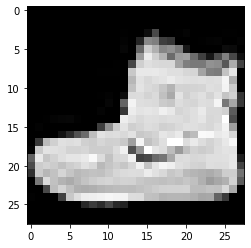

In [6]:
plt.imshow(x_train[0], cmap='gray', interpolation='none')

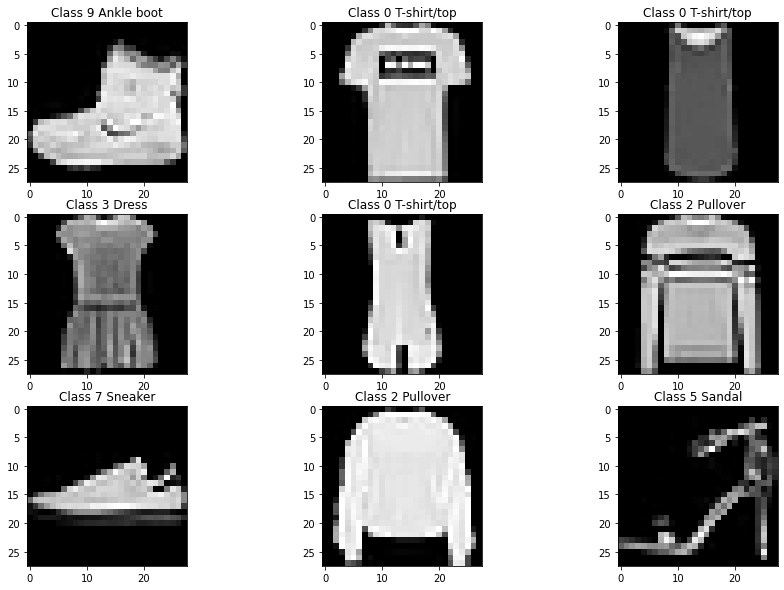

In [7]:
plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title(f"Class {y_train[i]} {class_names[y_train[i]]}")

## Logistic Regresion Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax'),
])  

## Deep Learning Model

![alt text](figure.png "Title")

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento

In [10]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

logdir = os.path.join("tutorial_4", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=10,
          batch_size=100,
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/10
600/600 [==============================] - 16s 26ms/step - loss: 0.6066 - accuracy: 0.7847 - val_loss: 0.3915 - val_accuracy: 0.8583
Epoch 2/10
600/600 [==============================] - 14s 24ms/step - loss: 0.3563 - accuracy: 0.8696 - val_loss: 0.3662 - val_accuracy: 0.8605
Epoch 3/10
600/600 [==============================] - 13s 22ms/step - loss: 0.3161 - accuracy: 0.8809 - val_loss: 0.3872 - val_accuracy: 0.8640
Epoch 4/10
600/600 [==============================] - 14s 23ms/step - loss: 0.2865 - accuracy: 0.8935 - val_loss: 0.3406 - val_accuracy: 0.8738
Epoch 5/10
600/600 [==============================] - 13s 21ms/step - loss: 0.2730 - accuracy: 0.8980 - val_loss: 0.3360 - val_accuracy: 0.8812
Epoch 6/10
600/600 [==============================] - 13s 21ms/step - loss: 0.2541 - accuracy: 0.9049 - val_loss: 0.3198 - val_accuracy: 0.8875
Epoch 7/10
600/600 [==============================] - 12s 21ms/step - loss: 0.2397 - accuracy: 0.9092 - val_loss: 0.3344 - val_accuracy:

# Evaluamos el resultado

In [11]:
score = model.evaluate(x_train, y_train,
                      verbose=0)
print('Train accuracy:', score[1])

Train accuracy: 0.9218833446502686


In [12]:
score = model.evaluate(x_test, y_test,
                      verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8844000101089478


https://github.com/zalandoresearch/fashion-mnist

In [13]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

/Users/fernando/git/my-code-vault/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


___

In [20]:
incorrect = 2

In [21]:
prob = model.predict(x_test[incorrect:incorrect+1])

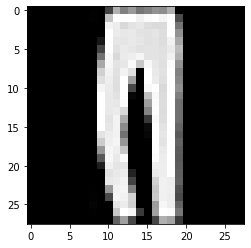

In [22]:
plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')

In [23]:
prob

array([[5.29562252e-17, 1.00000000e+00, 8.85091527e-19, 3.47276054e-14,
        3.05897280e-17, 1.00357183e-25, 1.70631505e-15, 2.10983399e-29,
        3.41857452e-18, 5.92620395e-24]], dtype=float32)

<BarContainer object of 10 artists>

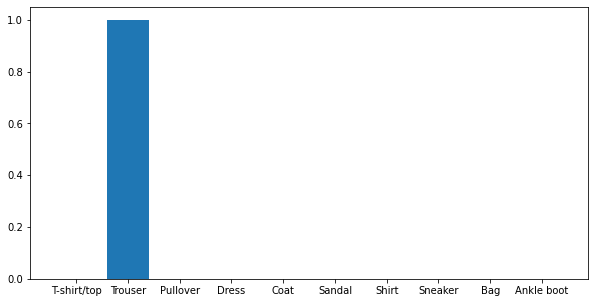

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(height = prob[0], x=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

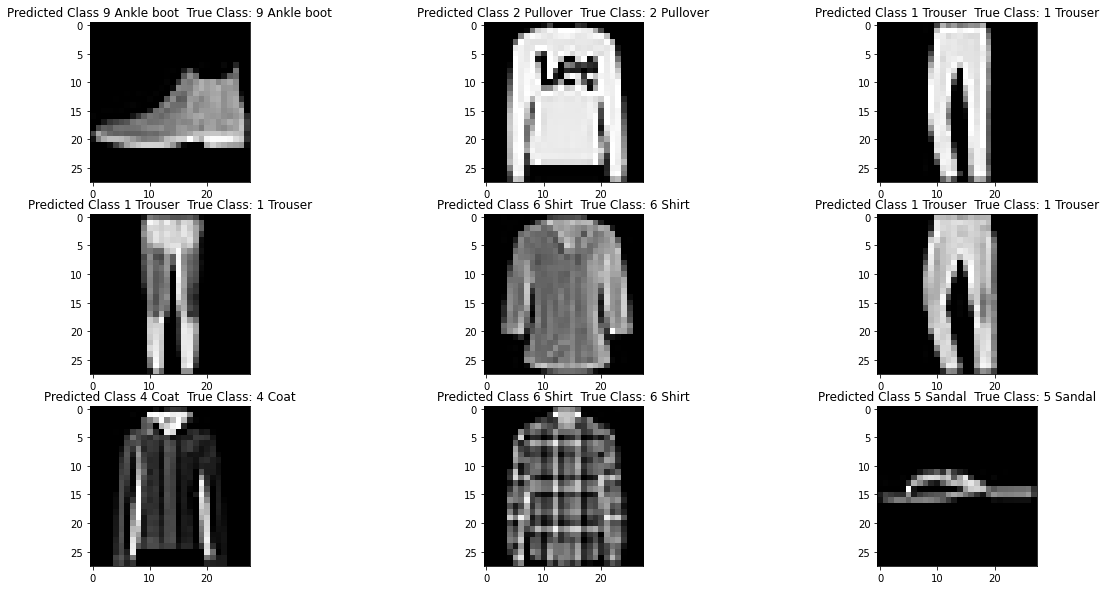

In [25]:
plt.figure(figsize=(20,10))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    #plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.title(f"Predicted Class {predicted_classes[correct]} {class_names[predicted_classes[correct]]}  True Class: {y_test[correct]} {class_names[y_test[correct]]}")

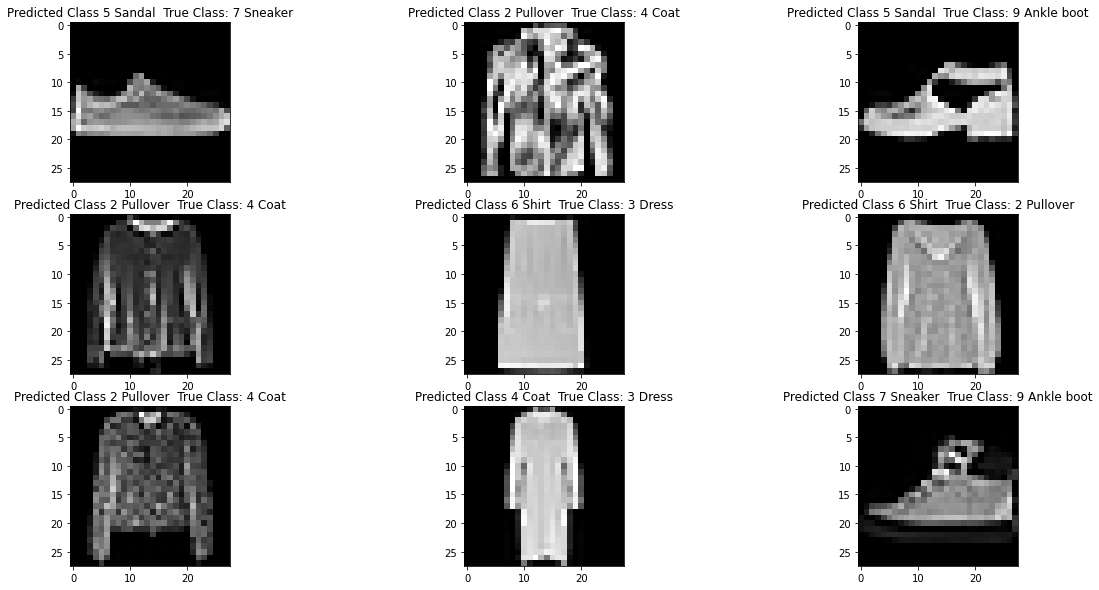

In [26]:
plt.figure(figsize=(20,10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"Predicted Class {predicted_classes[incorrect]} {class_names[predicted_classes[incorrect]]}  True Class: {y_test[incorrect]} {class_names[y_test[incorrect]]}")

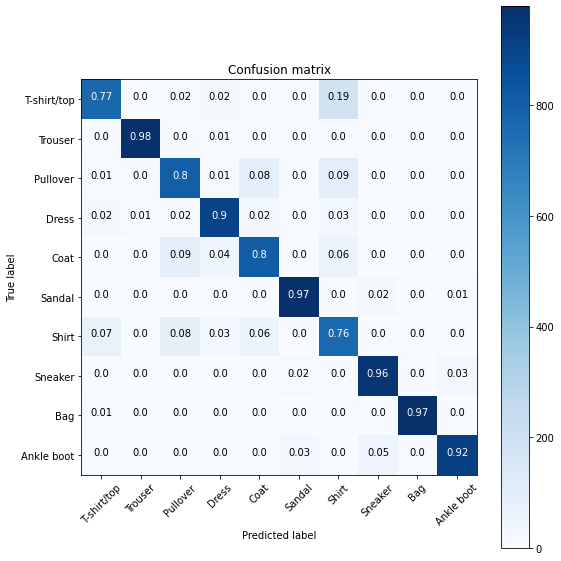

In [27]:
test_pred_raw = model.predict(x_test)
test_pred = np.argmax(test_pred_raw, axis=1)

import sklearn.metrics
import itertools

def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure


# Calculate the confusion matrix.
cm = sklearn.metrics.confusion_matrix(y_test, test_pred)
# Log the confusion matrix as an image summary.
figure = plot_confusion_matrix(cm, class_names=class_names)